# Prediction Using Supervised Machine Learning

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


### First we will import our training data on which we will build our model

In [51]:
df = pd.read_csv(f'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Always first check your data for missing values

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Now we will split our data into test and training sets to see the accuracy of our created model

In [53]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


### Now entering our data into the LinearRegression Model

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### After training it we will test our model with test data

In [55]:
y_pred = regressor.predict(X_test)
y_pred

array([75.63013047, 68.17946453, 81.21812993, 39.308134  , 76.56146371])

### Just for better understanding of our data we will print the comparision with the actual vs predicted data

In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df

,Actual,Predicted
0,85,75.630130
1,76,68.179465
2,81,81.218130
3,35,39.308134
4,86,76.561464


### Now we will predict it on our new entry of data whose outcome is unknown

In [57]:
y_pred_1 = regressor.predict([[7]])
print(y_pred_1)

[69.11079777]


### We can evalute our model with calculating it mean error

In [58]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.2310410437618895


### This gives us the visual representation of our data with respect to the trained model 

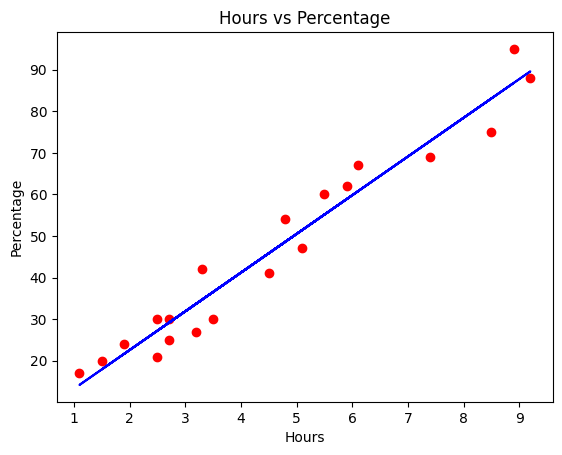

In [59]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()
